# Homework 6

### Achilles Edwin Alfred Saxby

### aes807

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Task 1 (5% credit) 
Provide a definition for the concept of a conjugate prior given the Bayesian learning model. What is the conjugate prior for the univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a fixed $\sigma$?

### Solution - Task (1)
In Bayesian probability theory, if the distribution of the posterior is of the same type as the prior distribution, the prior and the posterior are called conjugate distributions, and the prior is called a conjugate prior for the likelihood function.

Conjugate prior for the univarate linear regression:
$$
w\sim {\cal N}(w^*,\sigma^*)
$$

$$
= \frac{1}{\sqrt{2\pi}\sigma^ *}e^{-\frac{(w - w^*)^2}{2(\sigma^*)^2}}
$$

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Task 2 (5% credit). 
Which prior in the Bayesian linear regression framework leads to: a) Ridge regression, b) Lasso regression?


### Solution - Task (2)(a)
For Ridge regression, the prior corresponds to a distribution for $w$ of the form: $w_j\sim{\cal N}(0,\frac{\sigma}{\sqrt{\lambda}})$

Which leads to a solution of the form: $\hat{w}=argmin_w\left[RSS(w)+\lambda||w||_2^2\right]$

where: $||w||_2=\sqrt{\sum\limits_j w_j^2}$

### Solution - Task (2)(b)
For Lasso, the prior corresponds to a distribution of the form: $p(w_j)\sim e^{-\lambda|w_j|/\sigma}$

Which leads to a solution of the form: $\hat{w}=argmin_w\left[RSS(w)+\lambda||w||_1\right]$

Where: $||w||_1=\sum\limits_j |w_j|$

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Task 3 (10% credit). 
Answer some questions about the properties of Lasso/Ridge:

a) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?


b) Which of the Lasso and Ridge regressions often use to completely eliminate coefficients for some of the regressors?


c) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

d) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

### Solution - Task (3)(a)
Ridge Regression

### Solution - Task (3)(b)
Lasso Regression

### Solution - Task (3)(c)
For $\lambda$ = 0 both Lasso and Ridge are/become identical to OLS regression.

### Solution - Task (3)(d)
Validation set is used to estimate the $\lambda$ for Lasso or Ridge 
- A separate validation sample could be used for the selection of model parameters. But often the available dataset is small enough, so splitting into even smaller traning, validation and test sets could have negative impact on the model training, leading to noisy and unreliable models. In such cases cross-validation is often applied, performing not one but several random splits of the sample with further averaging of the model performance scores. 

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [31]:
import os
import csv
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.formula.api
import statsmodels.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from __future__ import print_function, division

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Task 4 (15% credit). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=1$ and the prior $w\sim {\cal N}(5,1)$. Compute the posterior distribution after an observation $y=12,x=2$. After all, what is the probability of having $w<5$?

In [14]:
sigma = 1.0
prior_w = 5.0
prior_s = 1.0

y = 12
x = 2

sigma_s = (sigma**-2)
prior_ss = (prior_s**-2)

post_w = (sigma_s * sum(y*x) + prior_ss * prior_w)/(sum(x**2)* sigma_s + prior_ss)
post_s = (prior_ss + sum(x**2)* sigma_s)**-0.5

print ('Posterior Distribution W ~ N({0}, {1})'.format(post_w, post_s))
print ('Probability of having  w<5 :',stats.norm.cdf(5, post_w, post_s))

Posterior Distribution W ~ N(5.8, 0.4472135955)
Probability of having  w<5 : 0.0368191350602


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Task 5 (20% credit). 
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [15]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session2/HW/Homework1_training.csv")
y_train=np.asarray(data_train.iloc[:,-1]) # make dependent variable
X_train=np.asarray(data_train.iloc[:,1:-2]) #make independent variables

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session2/HW/Homework1_test.csv")
y_test=np.asarray(data_test.iloc[:,-1]) # make dependent variable
X_test=np.asarray(data_test.iloc[:,1:-2]) #make independent variables

In [24]:
lm = sm.OLS(y_train, X_train).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 28 Nov 2016   Prob (F-statistic):                nan
Time:                        22:01:23   Log-Likelihood:                 119.68
No. Observations:                  30   AIC:                            -179.4
Df Residuals:                       0   BIC:                            -137.3
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1          1.807e+10        inf          0        n

In [38]:
Ridge=linear_model.Ridge(fit_intercept=False, alpha=500)
Ridge.fit(X_train,y_train)


p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for In Sample Ridge is: {0}".format(R_2_IS_Ridge))


p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for Out-Of-Sample Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for In Sample Ridge is: 0.929693875153
The R-squared we found for Out-Of-Sample Ridge is: 0.193501587759


- So while OLS reached almost perfect in performance over the training set (which is not too suprising as one would expect 39 regressors to be able to learn nearly all the infromation from the sample of 30 observations) it's generalizability is quite poor (test sample Rsquared goes way below zero). 
- So there is clearly an overfitting problem.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Task 6 (20% credit). 
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ and report their performance over the test set.

In [39]:
ridge = 40000
Ridge = linear_model.Ridge(fit_intercept=True, alpha=ridge)

Ridge.fit(X_train,y_train)

p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared for In-Sample Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared for Out-Of-Sample Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared for In-Sample Ridge is: 0.844237185406
The R-squared for Out-Of-Sample Ridge is: 0.678556452341


- So choice of lambda as 40000, Ridge works pretty well, mostly fixing the overfitting issue.

In [40]:
lasso = 40
Lasso=linear_model.Lasso(fit_intercept=True, alpha= lasso) 

Lasso.fit(X_train,y_train)

p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared for In-Sample Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_

p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared for Out-Of-Sample Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared for In-Sample Lasso is: 0.844237185406
The R-squared for Out-Of-Sample Lasso is: 0.671937901107


- Lasso also solves the overfitting problem to a greater extent and hence the performance over test set is pretty good. However we can improve the performance by caculating the best value of lambda in order to increase the performance over test set.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Task 7 (25% credit). 
For each $m=1,2,...39$ train OLS, Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ using the first $m$ columns of the data tables as the regressors and plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.

#### Code from lab session notebook

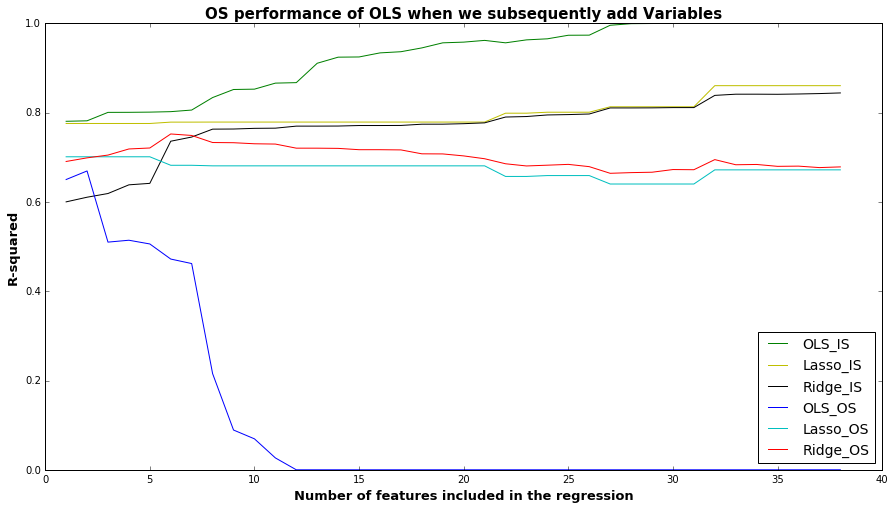

In [37]:
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

Number_variables = np.arange(1,39,1)
Ridge=linear_model.Ridge(fit_intercept=True,alpha = ridge)
Lasso=linear_model.Lasso(fit_intercept=True, alpha = lasso)

for j in Number_variables:
    # OLS
    lm = smf.OLS(y_train, smf.add_constant(X_train[:,:j+1])).fit()
    error = lm.predict(smf.add_constant(X_test[:, :j+1])) - y_test
    R_2_OS_OLS=1-error.var()/y_test.var()
    R_2_IS_OLS = lm.rsquared
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
    Ridge.fit(X_train[:,:j+1],y_train)
    # In sample:
    err_IS=Ridge.predict(X_train[:,:j+1]) - y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    #Out of sample
    err_OS=Ridge.predict(X_test[:,:j+1]) - y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    Lasso.fit(X_train[:,0:j+1],y_train)
    #In sample:
    p_IS=Lasso.predict(X_train[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)
    #Out of sample
    p_OS=Lasso.predict(X_test[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))

fig = figure(figsize=(15,8))
plt.title('OS performance of OLS when we subsequently add Variables', fontsize=15, fontweight = 'bold')

plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='OLS_IS')
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS')
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS')

plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='OLS_OS')
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS')
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS')

plt.legend(loc=4, fontsize=14)
plt.xlabel('Number of features included in the regression', fontsize=13, fontweight = 'bold')
plt.ylabel('R-squared', fontsize=13, fontweight = 'bold')
plt.show()

- The figure shows that Out-of-sample R-square for Ridge and Lasso are close to each other ranging between 0.6 to 0.7 
- Which is high suggesting an improvement for and solving the overfitting problem seen in OLS regression which is around 1.0

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Extracredit (25%)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 60% training and 40% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression: for each $\lambda$ of the considered sequence compute an average validation R2 for the 10 splits considered and finally select the $\lambda$ having the highest value for this average R2. Visualize the dependence of the said average cross-validation R2 over $\lambda$ for Lasso and Ridge. Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$.

#### Code taken from the Lab Session - Modified 
#### Help taken to complete the extra-credit, to understand and work, also to learn how the idea works

In [83]:
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False, crossV = 10):
    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=False, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=False, alpha=a)
        model_label='Lasso'

    best_avgR2 = -1
    best_lambda = lambdas[0]
    
    R2=[]

    for i in lambdas:
        for c in range(crossV):
            R_2_OS = []
            X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = p, random_state = 100+c)
            
            lm = RM(i)
            lm.fit(X_train0,y_train0)  
            y_predict=lm.predict(X_valid) 
            err_OS=y_predict-y_valid
            R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
            R_2_OS.append(R_2_OS_)
            
        avgR2 = np.array(R_2_OS).mean()
        R2.append(avgR2)
        if avgR2 > best_avgR2:
            best_avgR2 = avgR2
            best_lambda = i

    if Graph==True:
        fig = figure(figsize=(15,8))
        plt.title('Average R-squared vs Lambda', fontsize=20)
        if logl:
            plt.xlabel('ln(Lambda)', fontsize=16)
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda', fontsize=16)
            l=lambdas
            bl=best_lambda
        plt.plot(l, R2, 'black', label=model_label)
        plt.legend(loc=4, fontsize=16)
        plt.ylabel('Average R-squared', fontsize=16)
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()

    return (best_lambda, best_avgR2) 

#### Lambda for Ridge

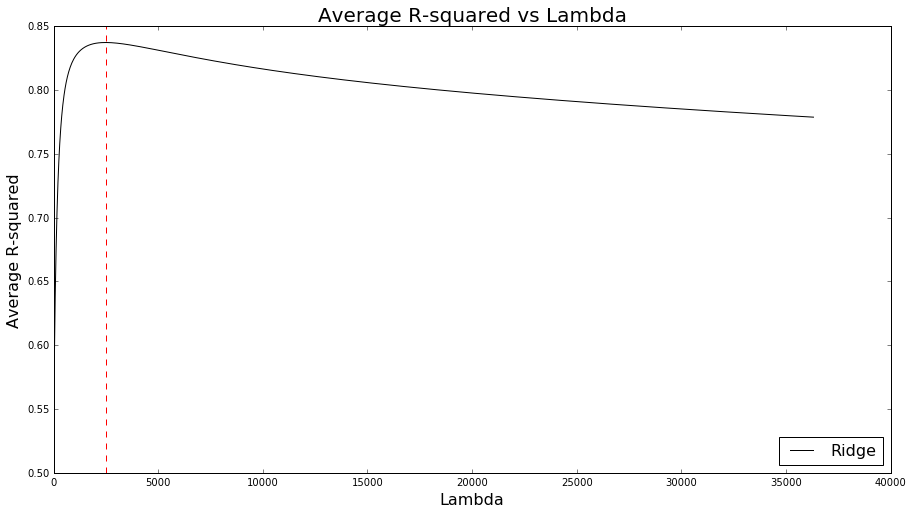

Optimal lambda for Ridge is  2511.55488049
Optimal R^2 for Ridge is  0.837370117205


In [53]:
lambdas = np.exp(np.linspace(-5,10.5,500))
lambda_r_opt, avgR2_r_opt = Regularization_fit_lambda(1, X_train, y_train, lambdas, p=0.4, Graph=True, logl=False, crossV=10)

print('Optimal lambda for Ridge is ', lambda_r_opt)
print('Optimal R^2 for Ridge is ', avgR2_r_opt)

#### Lambda for Lasso

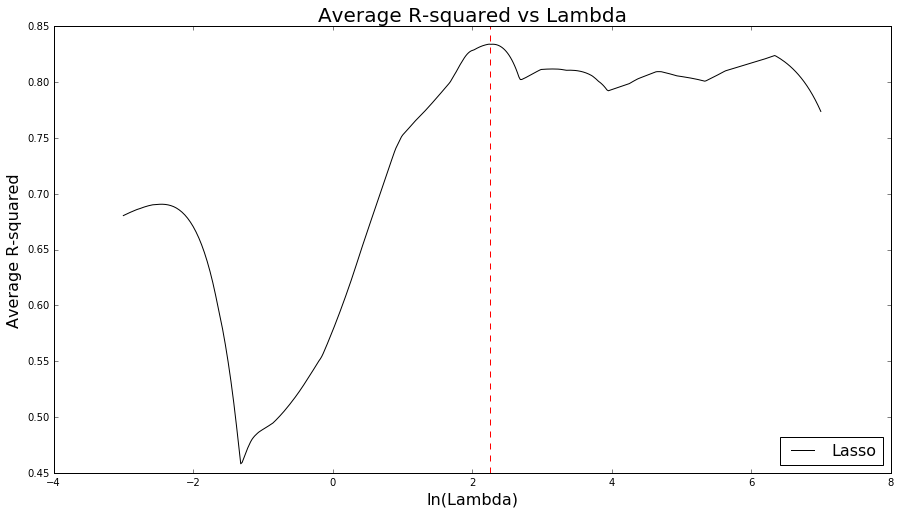

Optimal lambda for Lasso is  9.49249040195
Optimal R^2 for Lasso is  0.834075995303


In [56]:
lambdas = np.exp(np.linspace(-3,7,500))
lambda_l_opt, avgR2_l_opt = Regularization_fit_lambda(2, X_train, y_train, lambdas, p=0.4, Graph=True, logl=True, crossV=10)

print('Optimal lambda for Lasso is ', lambda_l_opt)
print('Optimal R^2 for Lasso is ', avgR2_l_opt)

#### Ridge Regression

In [64]:
lambda_ridge = lambda_r_opt
Ridge = linear_model.Ridge(fit_intercept=False, alpha=lambda_ridge) 

Ridge.fit(X_train,y_train)

p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared - In-Sample Ridge - Optimal Lambda is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared - Out-Of-Sample Ridge - Optimal Lambda is: {0}".format(R_2_OS_Ridge))

The R-squared - In-Sample Ridge - Optimal Lambda is: 0.919827646667
The R-squared - Out-Of-Sample Ridge - Optimal Lambda is: 0.46359664935


#### Lasso Regression

In [81]:
lambda_lasso = lambda_l_opt
Lasso=linear_model.Lasso(fit_intercept=False, alpha= lambda_lasso)

Lasso.fit(X_train,y_train)

p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared - In-Sample Lasso - Optimal Lambda is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_

p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared - Out-of-Sample Lasso - Optimal Lambda is: {0}".format(R_2_OS_Lasso))

The R-squared - In-Sample Lasso - Optimal Lambda is: 0.919827646667
The R-squared - Out-of-Sample Lasso - Optimal Lambda is: 0.524470193571


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Best of Luck!!